In [22]:
from fastdownload import download_url
from fastai.vision.all import *
import shutil

In [25]:
from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(term, max_images=100): return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [23]:
for subfolder in path.iterdir():
    if subfolder.is_dir():
        # Remove the entire subfolder and its contents
        shutil.rmtree(subfolder)
        print(f"Deleted folder: {subfolder}")

Deleted folder: this_or_not/Forest
Deleted folder: this_or_not/Bird


In [24]:
print("What do you want to classify")
opt1 = input()
opt2 = input()

What do you want to classify


 scissors 
 calculator


In [26]:
#searches = 'forest', 'bird'
searches = opt1, opt2
path = Path('this_or_not')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    resize_images(path/o, max_size=400, dest=path/o)

/Users/animesh/anaconda3/envs/FastAIEnv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/Users/animesh/anaconda3/envs/FastAIEnv/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [27]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

In [28]:
for o in searches:
    dest = path/o
    n_images = len(list(dest.glob('*')))
    print(f"Downloaded {n_images} images for '{o}'")

Downloaded 47 images for 'scissors '
Downloaded 92 images for 'calculator'


In [31]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(192, method='squish')
).dataloaders(path)


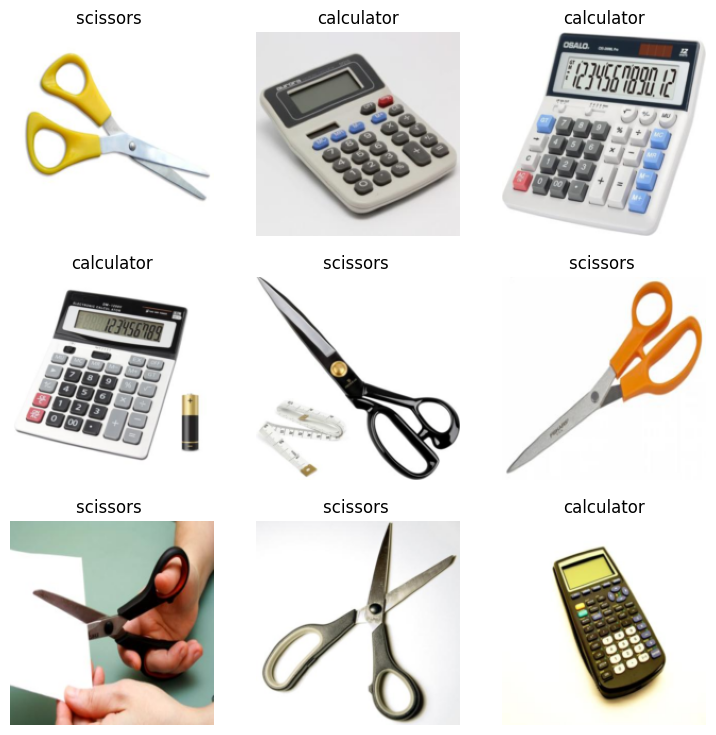

In [32]:
dls.show_batch()

In [33]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.748164,2.925581,0.259259,00:02


epoch,train_loss,valid_loss,error_rate,time
0,1.651638,1.640213,0.259259,00:01
1,1.328583,0.064094,0.000000,00:00
2,0.934907,0.001450,0.000000,00:00


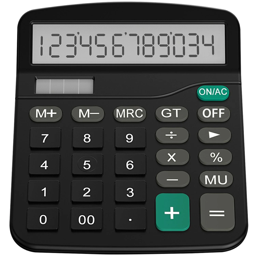

In [40]:
download_url(search_images('calculator', max_images=1)[0], 'calculator.jpg')
Image.open('calculator.jpg').to_thumb(256, 256)

In [42]:
is_thing, _, probs = learn.predict(PILImage.create('calculator.jpg'))
print(f"This is a:{is_thing}.")
print(f"Probability: {probs[0]:.4f}")

This is a:calculator.
Probability: 0.9999
